In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

To find the least-squares solution for the fit parameters when using QR factorization of $A$, we set $A = QR$. Then our typical fit equation becomes:

$$A^TN^{-1}Am = A^TN^{-1}d$$

$$(QR)^TN^{-1}(QR)m = QR)^TN^{-1}d$$

$$R^TQ^TN^{-1}QRm = R^TQ^TN^{-1}d$$

$$\hat{m} = (R^TQ^TN^{-1}QR)^{-1}R^TQ^TN^{-1}d$$

For the fit, we will assume that $N = \mathbb{1}$, so we can effectively ignore the $N^{-1}$ factor and our equation becomes:

$$\hat{m} = (R^TQ^TQR)^{-1}R^TQ^Td$$

Now, $Q^TQ = \mathbb{1}$ since it is an orthogonal rectangular matrix, so:

$$\hat{m} = (R^TR)^{-1}R^TQ^Td$$

$$\hat{m} = R^{-1}R^{-T}R^TQ^Td$$

But $R^{-T}R^T = \mathbb{1}$ since $R$ is triangular.

$$\hat{m} = R^{-1}Q^Td$$

In [2]:
def classical(x, y):
    '''performs the classical least-squares fit of parameters'''
    deg = 100
    x_rescale = np.interp(x, (min(x), max(x)), (-1, 1))    
    A = np.polynomial.chebyshev.chebvander(x_rescale, deg)
    
    lhs = A.T @ A
    rhs = A.T @ y
    
    m = np.linalg.pinv(lhs) @ rhs
    pred = A @ m
    
    return pred

In [3]:
def QR(x, y):
    '''performs least-squares fit of parameters using QR decomposition'''
    deg = 100
    x_rescale = np.interp(x, (min(x), max(x)), (-1, 1))    
    A = np.polynomial.chebyshev.chebvander(x_rescale, deg)
    
    q, r = np.linalg.qr(A, mode='reduced')
    
    m = np.linalg.pinv(r) @ q.T @ y
    pred = A @ m
    
    return pred

In [4]:
x = np.linspace(-1, 1, 501)
y = np.sin(x)

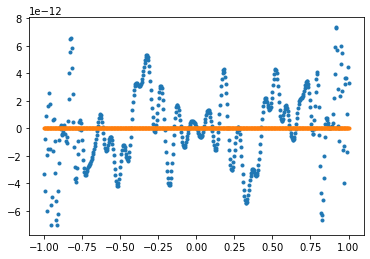

In [5]:
plt.plot(x, y - classical(x, y), '.')
plt.plot(x, y - QR(x, y), '.')
plt.show()

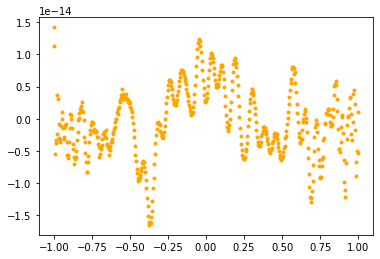

In [6]:
plt.plot(x, y - QR(x, y), '.', color='orange')

For the fit, I used a polynomial of degree 100. We see in the plot above that the errors produced when using the classical method are much larger than those we get with QR decomposition. In fact, we get an increase in accuracy by a factor of $10^2$.

# Problem 2

## part a

To show that the fit using Chebyshev polynomials remains stable even when using a large order of polynomials, I have performed the fit for a range of orders and plotted their errors. We see that even for order 100, the errors are very small when comparing the produced model with the real data. This gives confidence that the Chebyshev polynomials produce stable fits even at high orders. 

In [7]:
x = np.linspace(-1, 1, 1001)
y = np.exp(x)

degs = np.linspace(3, 100, 20, dtype=int)
evals = []

for deg in degs:
    cfit = np.polynomial.chebyshev.chebfit(x, y, deg)
    evals.append(np.polynomial.chebyshev.chebval(x, cfit))


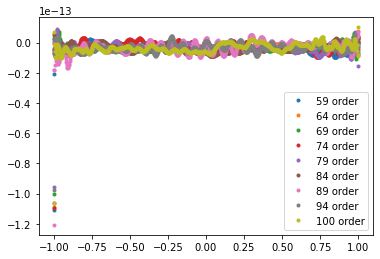

In [8]:
for i, e in enumerate(evals):
    if i > 10:
        plt.plot(x, y-e, '.', label='{} order'.format(degs[i]))
plt.legend()
plt.show()

## part b

I made 2 fits using Chebyshev polynomials. The first one had 7 terms (6th order) and the second initially had 201 terms (200th order) and was truncated to have the same number of terms (7). When truncating the 200th order Chebyshev polynomial, the highest term that was being left was $\approx 3.2 \times 10^{-6}$. Now we look at the RMS and maximum errors produced by both of these fits.

In [9]:
x = np.linspace(-1, 1, 1001)
y = np.exp(x)

cfit6 = np.polynomial.chebyshev.chebfit(x, y, 6)
cval6 = np.polynomial.chebyshev.chebval(x, cfit6)

cfit200 = np.polynomial.chebyshev.chebfit(x, y, 200)
c_use = cfit200[:7]
print('Largest truncated term is = ', cfit[7])
print()
cval200 = np.polynomial.chebyshev.chebval(x, c_use)

RMS6 = np.sqrt(np.mean((cval6-y)**2))
max6 = max(np.abs(y - cval6))

RMS200 = np.sqrt(np.mean((cval200-y)**2))
max200 = max(np.abs(y - cval200))


print('deg 6 - RMS error of fit is ',  RMS6)
print('deg 6 - max error of fit is ', max6)
print()
print('truncated - RMS error of fit is ',  RMS200)
print('truncated- max error of fit is ', max200)

Largest truncated term is =  3.198436461482495e-06

deg 6 - RMS error of fit is  1.985283248268722e-06
deg 6 - max error of fit is  7.984979888409072e-06

truncated - RMS error of fit is  2.2587721922796634e-06
truncated- max error of fit is  3.409822337374635e-06


In [10]:
print('truncated fit has a max error a factor of', 
      max6 / max200, 'smaller than deg 6 fit')

truncated fit has a max error a factor of 2.341758337637333 smaller than deg 6 fit


In [11]:
print('truncated fit has a RMS error that is', 
      ((RMS200 / RMS6) - 1)*100, 'percent larger than deg 6 fit')

truncated fit has a RMS error that is 13.775814823876598 percent larger than deg 6 fit


We see that for the 6th order fit, the RMS error was around 13.8% smaller than for the truncated fit. However, for the maximum error, the one produced by the trncated fit was over a factor of 2 smaller. In addition, the maximum error for the truncated fit was of $\approx 3.4 \times 10^{-6}$, which is very close to the largest term remaining out of the fit after we truncated it. This in fact agrees with what we expected. With these 2 things, we see how useful Chebyshev polynomials can be for fitting models. 

# Problem 3

We want to use the eigenvalues and eigenvectors of a correlated noise matrix to produce realizations of random correlated data. In order to do that, we recall the following expressions.

First, we decompose the correlated noise into its eigenvalues $\Lambda$ and eigenvectors $V$.

$$N = V \Lambda V^T$$

Then, based on the least-square notes provided and the example of Cholesky decomposition, we could see the equivalence of $L$ and $V$ and $\Lambda$, as 

$$N = LL^T = V \Lambda V^T \rightarrow L = V \Lambda^{\frac{1}{2}}$$

Therefore, in order to generate our random correlated data, we can use:

$$\tilde{d} = V \Lambda^{\frac{1}{2}} d$$

Then, after generating many realization of this for a given example $N$, I show that $<dd^T>$ converges to $N$.

In [12]:
def gen_corr(N):
    '''generates random correlated data through eigen vals/vects of noise matrix'''
    
    dat = np.random.randn(N.shape[0])
    evals, evecs = np.linalg.eigh(N)
    corr_dat = evecs @ (evals ** (1/2) * dat)
    
    return corr_dat

In [14]:
# checking that avg(d d.t) converges to N with average of many realizations
nreals = 10000
outer = []
for i in range(nreals):
    # generate example noise matrix
    N = np.identity(7) * 2
    N[N == 0] = 1
    # get random correlated data
    corr_dat = gen_corr(N)
    # save to get the average over many realizations
    outer.append(np.outer(corr_dat, corr_dat.T))
    
print('coverges with 1000 realizations to')
np.mean(outer, axis=0)

coverges with 1000 realizations to


array([[1.95493777, 0.98766122, 0.99617866, 0.98491399, 0.9914464 ,
        0.97553223, 0.97845384],
       [0.98766122, 2.0045162 , 1.01103756, 0.98382253, 1.00467753,
        1.00072745, 1.00714829],
       [0.99617866, 1.01103756, 2.00632973, 0.9926575 , 1.00512231,
        1.01254336, 0.99981359],
       [0.98491399, 0.98382253, 0.9926575 , 1.95453978, 0.98928988,
        1.00443943, 0.99708016],
       [0.9914464 , 1.00467753, 1.00512231, 0.98928988, 1.98991971,
        1.00108301, 0.99537389],
       [0.97553223, 1.00072745, 1.01254336, 1.00443943, 1.00108301,
        1.99385413, 0.99978693],
       [0.97845384, 1.00714829, 0.99981359, 0.99708016, 0.99537389,
        0.99978693, 2.00438562]])

We can see that this is approaching the matrix with 2s on the diagonal and 1s everywhere else. 

# Problem 4

In [15]:
def generate_N(a, sigma, size):
    
    N = np.zeros((size,size))
    
    for i in range(len(N)):
        for j in range(len(N)):
            N[i][j] = a * np.exp(-(i-j)**2 / (2*sigma**2))
            if i == j:
                N[i][j] += (1 - a)
    
    return N

In [16]:
x = np.linspace(0, 999, 1000)
sig_source = 50
amp_source = 1
source = amp_source * np.exp(-(x - np.mean(x))**2/(2*sig_source**2))

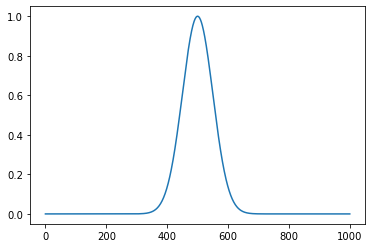

In [17]:
plt.plot(x, source)
plt.show()

In [18]:
aa = [0.1, 0.5, 0.9]
sigs = [5, 50, 500]
errs = []

for a in aa:
    for sig in sigs:
        N = generate_N(a, sig, len(x))
        err = 1/np.sqrt(source.T @ np.linalg.inv(N) @ source)
        errs.append(err)

In [19]:
errs

[0.15576335487646098,
 0.33774489562315885,
 0.1275749999311398,
 0.27599935080333926,
 0.7140544770562214,
 0.10066386685510005,
 0.3578952599636375,
 0.9499319468584101,
 0.04892550964025482]

In [20]:
print('checking if correct based on example. Error for a = 0.5, sig = 5 ----', errs[3])

checking if correct based on example. Error for a = 0.5, sig = 5 ---- 0.27599935080333926


In [21]:
a_max, sig_max = 0.9, 50
N = generate_N(a_max, sig_max, len(x))
err_max = 1/np.sqrt(source.T @ np.linalg.inv(N) @ source)
print('maximum error bar is =', err_max, 'for a = {}, sig = {}'.format(a_max, sig_max))

maximum error bar is = 0.9499319468584101 for a = 0.9, sig = 50


In [22]:
a_min, sig_min = 0.9, 500
N = generate_N(a_min, sig_min, len(x))
err_min = 1/np.sqrt(source.T @ np.linalg.inv(N) @ source)
print('minimum error bar is =', err_min, 'for a = {}, sig = {}'.format(a_min, sig_min))

minimum error bar is = 0.04892550964025482 for a = 0.9, sig = 500


We see the set of parameters with the worst error bars is $(a, \sigma) = (0.9, 50)$ with a value of $\approx 0.95$. The set of parameters with the smallest error bars is $(a, \sigma) = (0.9, 500)$ with a value of $\approx 0.05$. Therefore, we should be most concerned about noise that has a high correlation between points at a medium distance scale.

We see that for any chosen value of $a$, the error bars are always worst for the intermetiate value of $\sigma$ and the best for the largest value of $\sigma$, meaning when the points are correlated over a large distance.

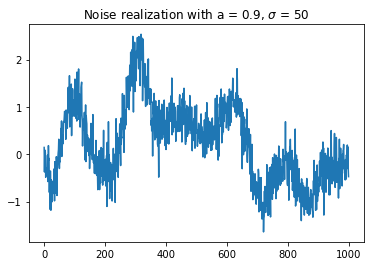

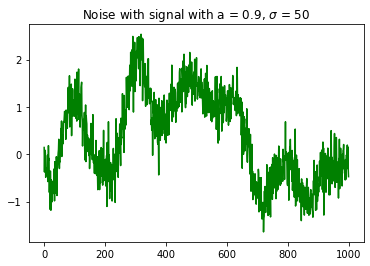

In [23]:
N = generate_N(0.9, 50, len(x))
dat_corr = gen_corr(N)
plt.plot(dat_corr)
plt.title('Noise realization with a = {}, $\sigma$ = {}'.format(0.9, 50))
plt.show()
plt.plot(dat_corr + source, color='green')
plt.title('Noise with signal with a = {}, $\sigma$ = {}'.format(0.9, 50))
plt.show()

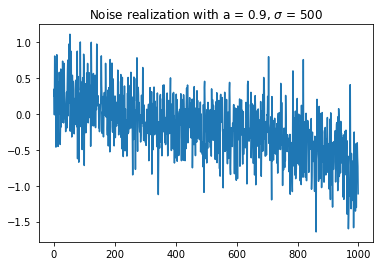

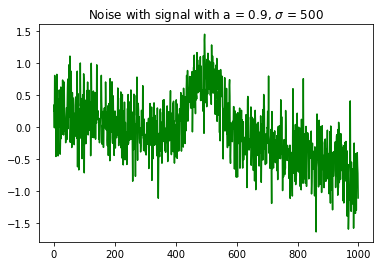

In [24]:
N = generate_N(0.9, 500, len(x))
dat_corr = gen_corr(N)
plt.plot(dat_corr)
plt.title('Noise realization with a = {}, $\sigma$ = {}'.format(0.9, 500))
plt.show()
plt.plot(dat_corr + source, color='green')
plt.title('Noise with signal with a = {}, $\sigma$ = {}'.format(0.9, 500))
plt.show()

Looking at a noise relization of both the best and worst error bar combinations of $(a, \sigma)$, we can see why $0.9, 500$ was the best combination and $0.9, 50$ was the worst. With the highly correlated noise at large distances, the signal still jumps out and is quite easy to spot even visually. On the other hand, when the correlation is high as a medias distance scale, the signal and noise become very hard to distinguish from each other. This also comes from the fact that we used a signal with a width or $\sigma_{src} = 50$, therefore our noise and signal have the same statistical spread for the worst case. All of this combined paints a picture that explains why these combinations of parameters produced the error bars on amplitude fit that they did. 

In summary, the kind of noise we should be most worried about is noise that is highly correlated on a scale similar to the spread of our actual signal.